In [13]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import os
np.random.seed(42)
import random
random.seed(42)

In [2]:
# user defined functions
def popTrim(testset, movieFreq):
    return [x for x in testset if movieFreq[int(x[1])] > 2]

def unpopTrim(testset, movieFreq):
    return [x for x in testset if movieFreq[int(x[1])] <= 2]

def highVarTrim(testset, movieFreq, movieVar):
    return [x for x in testset 
            if movieVar[int(x[1])] >= 2 and movieFreq[int(x[1])] >= 5]

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)


### loading the user_id and ratings

In [3]:
file_path_ratings = os.path.expanduser('ml-latest-small/ratings.csv')
file_path_movies = os.path.expanduser('ml-latest-small/movies.csv')

user_id = []
movie_id = []
ratings = []

# loading the user_id and ratings
with open(file_path_ratings) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        user_id.append(int(row['userId']))
        movie_id.append(int(row['movieId']))
        ratings.append(float(row['rating']))

In [4]:
user_number = len(np.unique(user_id))
movie_number = len(np.unique(movie_id))
movie_list = dict()
movie_id_u=[]
movie_idx = 0
for id in movie_id:
    if id not in movie_id_u:
        movie_list[id]=int(movie_idx)
        movie_id_u.append(id)
        movie_idx += 1

In [5]:
print('number of user=',user_number)
print('number of rated movie=',movie_number)
total_available_rating=len(user_id)
total_possible_rating=user_number*movie_number
print('Sparsity=',float(total_available_rating) / total_possible_rating)

('number of user=', 610)
('number of rated movie=', 9724)
('Sparsity=', 0.016999683055613623)


In [6]:
R = np.zeros((user_number, movie_number))  
W = np.zeros((user_number, movie_number))
for i in range(len(user_id)):
    x = user_id[i] - 1
    y =  int(movie_list[movie_id[i]])
    R[x,y] = ratings[i]
    W[x,y]=1

In [20]:
movieFreq = np.sum(R != 0, axis = 0)
movieFreq_dict = {m: movieFreq[movie_list[m]] for m in movie_list.keys()}
movieVar = [np.var([e for e in row if e != 0]) for row in np.transpose(R)]
movieVar_dict = {m: movieVar[movie_list[m]] for m in movie_list.keys()}

# 4 Model-based collaborative filtering

In [7]:
# Loading data with built-in functions from surprise
from surprise.model_selection import cross_validate
from surprise import KNNWithMeans
from surprise import Reader, Dataset
from surprise.model_selection import KFold
from surprise import accuracy
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader)

## Question 17

In [9]:
# define a cross-validation iterator
kf = KFold(n_splits=10)
kValues = range(2, 52, 2)

In [11]:
from surprise import NMF

RMSEs10 = []; MAEs10 = []
for k in kValues:
    print('k = ', k)
    algo = NMF(n_factors=k)
    rmse_kf = []; mae_kf = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        rmse_kf.append(accuracy.rmse(predictions, verbose=False))
        mae_kf.append(accuracy.mae(predictions, verbose=False))
    RMSEs10.append(np.mean(rmse_kf))
    MAEs10.append(np.mean(mae_kf))

('k = ', 2)
('k = ', 4)
('k = ', 6)
('k = ', 8)
('k = ', 10)
('k = ', 12)
('k = ', 14)
('k = ', 16)
('k = ', 18)
('k = ', 20)
('k = ', 22)
('k = ', 24)
('k = ', 26)
('k = ', 28)
('k = ', 30)
('k = ', 32)
('k = ', 34)
('k = ', 36)
('k = ', 38)
('k = ', 40)
('k = ', 42)
('k = ', 44)
('k = ', 46)
('k = ', 48)
('k = ', 50)


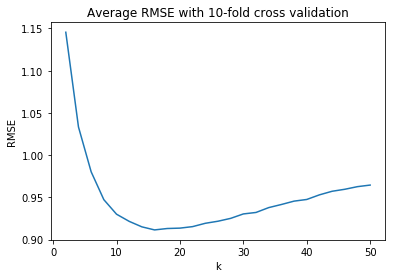

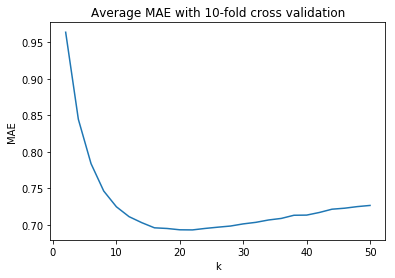

In [14]:
plt.plot(kValues, RMSEs10)
plt.title("Average RMSE with 10-fold cross validation")
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

plt.plot(kValues, MAEs10)
plt.title("Average MAE with 10-fold cross validation")
plt.xlabel('k')
plt.ylabel('MAE')
plt.show()

## Question 18

In [15]:
for idx in range(len(kValues)):
    print('k =', kValues[idx], '  RMSE =', RMSEs10[idx], '  MAE =', MAEs10[idx])

('k =', 2, '  RMSE =', 1.145512117878268, '  MAE =', 0.96353612546213)
('k =', 4, '  RMSE =', 1.0333770272579361, '  MAE =', 0.8444768309417723)
('k =', 6, '  RMSE =', 0.9802976037118187, '  MAE =', 0.7837942596597488)
('k =', 8, '  RMSE =', 0.9473137110712191, '  MAE =', 0.7463809150937286)
('k =', 10, '  RMSE =', 0.9301166268380742, '  MAE =', 0.7247937868291844)
('k =', 12, '  RMSE =', 0.9216170922338073, '  MAE =', 0.7112807637147278)
('k =', 14, '  RMSE =', 0.9151303252014541, '  MAE =', 0.7030805759050184)
('k =', 16, '  RMSE =', 0.911499113630572, '  MAE =', 0.6960355994339599)
('k =', 18, '  RMSE =', 0.9131629150731341, '  MAE =', 0.6951228940177722)
('k =', 20, '  RMSE =', 0.9136151543739979, '  MAE =', 0.6933186033013998)
('k =', 22, '  RMSE =', 0.9153998918160191, '  MAE =', 0.6931537858782687)
('k =', 24, '  RMSE =', 0.9193398362966315, '  MAE =', 0.6951865241377124)
('k =', 26, '  RMSE =', 0.9217884892703381, '  MAE =', 0.6968850955094992)
('k =', 28, '  RMSE =', 0.9251720

In [16]:
k_best = 16

In [21]:
RMSEs12 = []; MAEs12 = []
RMSEs13 = []; MAEs13 = []
RMSEs14 = []; MAEs14 = []
for k in kValues:
    print('k = ', k)
    algo = NMF(n_factors=k)
    rmse_1 = []; mae_1 = []
    rmse_2 = []; mae_2 = []
    rmse_3 = []; mae_3 = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        
        prediction1 = algo.test(popTrim(testset, movieFreq_dict))
        prediction2 = algo.test(unpopTrim(testset, movieFreq_dict))
        prediction3 = algo.test(highVarTrim(testset, movieFreq_dict, movieVar_dict))
        
        rmse_1.append(accuracy.rmse(prediction1, verbose=False))
        mae_1.append(accuracy.mae(prediction1, verbose=False))
        rmse_2.append(accuracy.rmse(prediction2, verbose=False))
        mae_2.append(accuracy.mae(prediction2, verbose=False))
        rmse_3.append(accuracy.rmse(prediction3, verbose=False))
        mae_3.append(accuracy.mae(prediction3, verbose=False))
        
    RMSEs12.append(np.mean(rmse_1))
    MAEs12.append(np.mean(mae_1))
    RMSEs13.append(np.mean(rmse_2))
    MAEs13.append(np.mean(mae_2))
    RMSEs14.append(np.mean(rmse_3))
    MAEs14.append(np.mean(mae_3))

('k = ', 2)
('k = ', 4)
('k = ', 6)
('k = ', 8)
('k = ', 10)
('k = ', 12)
('k = ', 14)
('k = ', 16)
('k = ', 18)
('k = ', 20)
('k = ', 22)
('k = ', 24)
('k = ', 26)
('k = ', 28)
('k = ', 30)
('k = ', 32)
('k = ', 34)
('k = ', 36)
('k = ', 38)
('k = ', 40)
('k = ', 42)
('k = ', 44)
('k = ', 46)
('k = ', 48)
('k = ', 50)


## Question 19

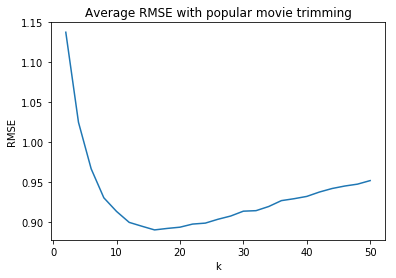

In [22]:
plt.plot(kValues, RMSEs12)
plt.title("Average RMSE with popular movie trimming")
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

# plt.plot(kValues, MAEs12)
# plt.title("Average MAE with popular movie trimming")
# plt.xlabel('k')
# plt.ylabel('MAE')
# plt.show()

## Question 20

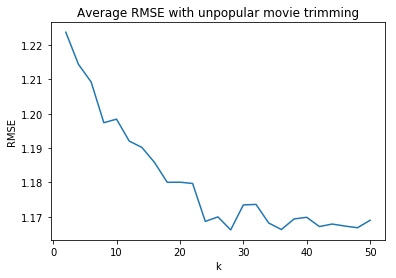

In [23]:
plt.plot(kValues, RMSEs13)
plt.title("Average RMSE with unpopular movie trimming")
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

# plt.plot(kValues, MAEs13)
# plt.title("Average MAE with unpopular movie trimming")
# plt.xlabel('k')
# plt.ylabel('MAE')
# plt.show()

## Question 21

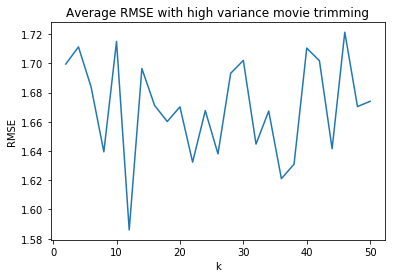

In [24]:
plt.plot(kValues, RMSEs14)
plt.title("Average RMSE with high variance movie trimming")
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

# plt.plot(kValues, MAEs14)
# plt.title("Average MAE with high variance movie trimming")
# plt.xlabel('k')
# plt.ylabel('MAE')
# plt.show()

## Question 22

In [25]:
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
# train the model with best k
trainset, testset = train_test_split(data, test_size=0.1)
algo = NMF(n_factors=k_best)
algo.fit(trainset)
prediction4 = algo.test(testset)
# for pred in prediction4:
#     print(pred[2], pred[3])

('threshold = ', 2.5)


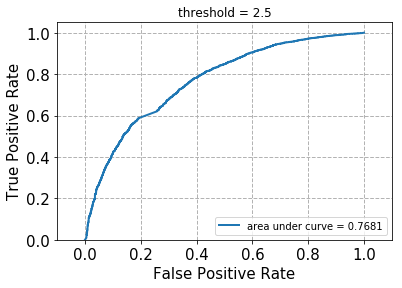

('threshold = ', 3)


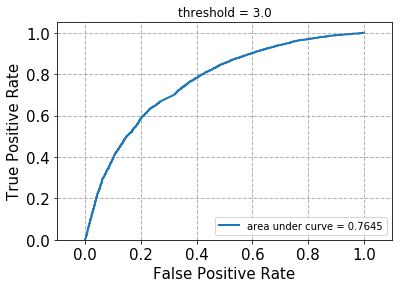

('threshold = ', 3.5)


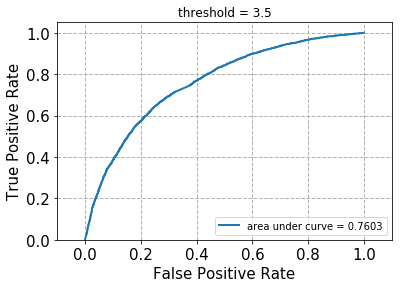

('threshold = ', 4)


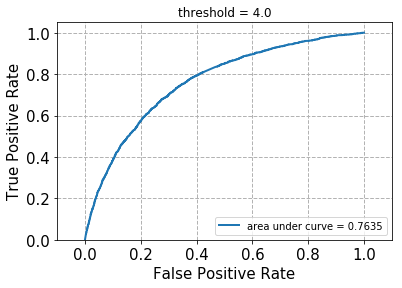

In [26]:
thresholds = [2.5, 3, 3.5, 4]
for t in thresholds:
    print('threshold = ', t)
    y = [1 if pred[2] > t else 0 for pred in prediction4]
    scores = [pred[3] for pred in prediction4]
    fpr, tpr, _ = roc_curve(y, scores)
    plot_roc(fpr, tpr)
    plt.title('threshold = %.1f' % t)
    plt.show()